#Step 0 - Setup the learning environment

To begin, we import some library modules and functions that we will use.   

Numpy is a collection of math functions including various matrix operations - see http://www.numpy.org/.   Matplotlib is a 2D plotting library  - see https://matplotlib.org/.


In [33]:
"""
perceptron.py

Backpropagation tutorial using a basic one-layer perceptron, without
the aid of additional NN libraries. 
This one-layer, one node ANN has only an output layer but can learn 
OR and AND functions.

The program uses  Numpy for faster matrix operations and 
Matplotlib for plotting the training error per epoch

"""
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

print("The enviriment is ready.")

The enviriment is ready.


#Step 1 -  Create the training data.
The data can be examples of any simple two variable boolean logic function such as OR, AND, or XOR.

In [34]:
# Define the function inputs values: bias row, x1 row, x2 row
#data_in = np.array([(1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)])
#data_in = data_in.T
data_in = np.array([(1, 1, 1, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

# Define the function through the sequence of target output values
target = np.array([0, 1, 1, 1])  # OR
#target = np.array([0, 0, 0, 1])  # AND
#target = np.array([0, 1, 1, 0])  # XOR

print(data_in.T)
print(target)

[[1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]]
[0 1 1 1]


#Step 2 - Configure the neural network architecture 
This simple network has no hidden nodes, just three weights associated with the output node. 

In [35]:
# Set the learing parameters
learning_rate = 0.1
num_epochs = 200

# Set the input and output dimensions
size_in = data_in.shape[0]
size_out = target.ndim

# Set the seed value of the random number generator
random_seed = 2
np.random.seed(random_seed)

# Initialize the weights of the network
weight_out = np.random.rand(size_out, size_in) - 0.5

# Initialize a vector to store the train errors for each epoch
error_log = np.zeros(num_epochs)

print(weight_out)

[[-0.0640051  -0.47407377  0.04966248]]


#Step 3 - Fit the data to the model
Use either the original Perceptron node with a step activation function 
Or a more modern Perceptron node with a sigmoid activation function.

The model uses the mean squared error (MSE) loss function, which works well with the sigmoid activation output nodes. 
It uses the gradient descent weight update algorithm.


In [36]:

# This code uses a step function for the activation function 
for i in range(0, num_epochs):
    predicted_out = np.dot(weight_out, data_in) > 0
    weight_out = weight_out + learning_rate * np.dot((target - predicted_out), data_in.T)
    error_log[i] = 0.5 * ((target - predicted_out) ** 2).mean(axis=None)
    if (i % 20) == 0:
        print("Iter: %d, OR MSE: %8.7f" % (i, error_log[i]))        


# This code uses a sigmoid function for the activation function 
#for i in range(0, num_epochs):
#    predicted_out = 1 / (1 + np.exp(np.dot(-weight_out, data_in)))
#    deriv_out = (predicted_out * (1 - predicted_out)) * (target - predicted_out)
#    deriv_weight_out = learning_rate * np.dot(data_in, deriv_out.T).T
#    weight_out = weight_out + deriv_weight_out
#    error_log[i] = 0.5 * ((target - predicted_out) ** 2).mean(axis=None)
#    if (i % 20) == 0:
#       print("Iter: %d, MSE: %8.7f" % (i, error_log[i]))


Iter: 0, OR MSE: 0.3750000
Iter: 20, OR MSE: 0.0000000
Iter: 40, OR MSE: 0.0000000
Iter: 60, OR MSE: 0.0000000
Iter: 80, OR MSE: 0.0000000
Iter: 100, OR MSE: 0.0000000
Iter: 120, OR MSE: 0.0000000
Iter: 140, OR MSE: 0.0000000
Iter: 160, OR MSE: 0.0000000
Iter: 180, OR MSE: 0.0000000


#Step 4 - Evaluate the model on the training set and print the results.
And then plot the training error for each epoch through the data.

Target outputs: [0 1 1 1]
Predicted outputs: [[0 1 1 1]]


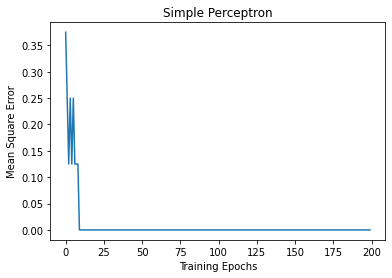

In [37]:
# Print the traget values and the networks predictions
print("Target outputs:", target)
print("Predicted outputs:", predicted_out*1)

# Set up the plot of the training error by epoch
plt.figure(1)
plt.xlabel('Training Epochs')
plt.ylabel('Mean Square Error')
plt.title('Simple Perceptron')
plt.plot(error_log)
plt.draw()

plt.show()  # keeping the plots alive until you close them